### The project is to do nlp analysis on movie&TV reviews. The dataset is from https://nijianmo.github.io/amazon/index.html under the 'Movies and TV' session. I used a subset of the dataset and later used a smaller fraction of the dataset because of running time and memory limit. I ended up using 1690 rows of reviews with total 69565 terms at this point. 

### I first did `text processing`, filtered out digit and punctuations and then vectorized text. However, the resulting document-term matrix contained too many meaingless words and symbols, such as "zzzzzzz", "aaa", etc. So I used `pos_tag` instead before vectorization to identify words that are verbs, nouns, adjectives and adverbs and left other words out. 

### After text processing done, I visualized the common words using `WordCloud`. `Vectorized` the corpus and did `topic modeling`. 

### My next steps include iterate the process mentioned above on a bigger dataset; refine topic modeling; try collabrative recommmender system.

### Current deliveries:
#### WordCloud
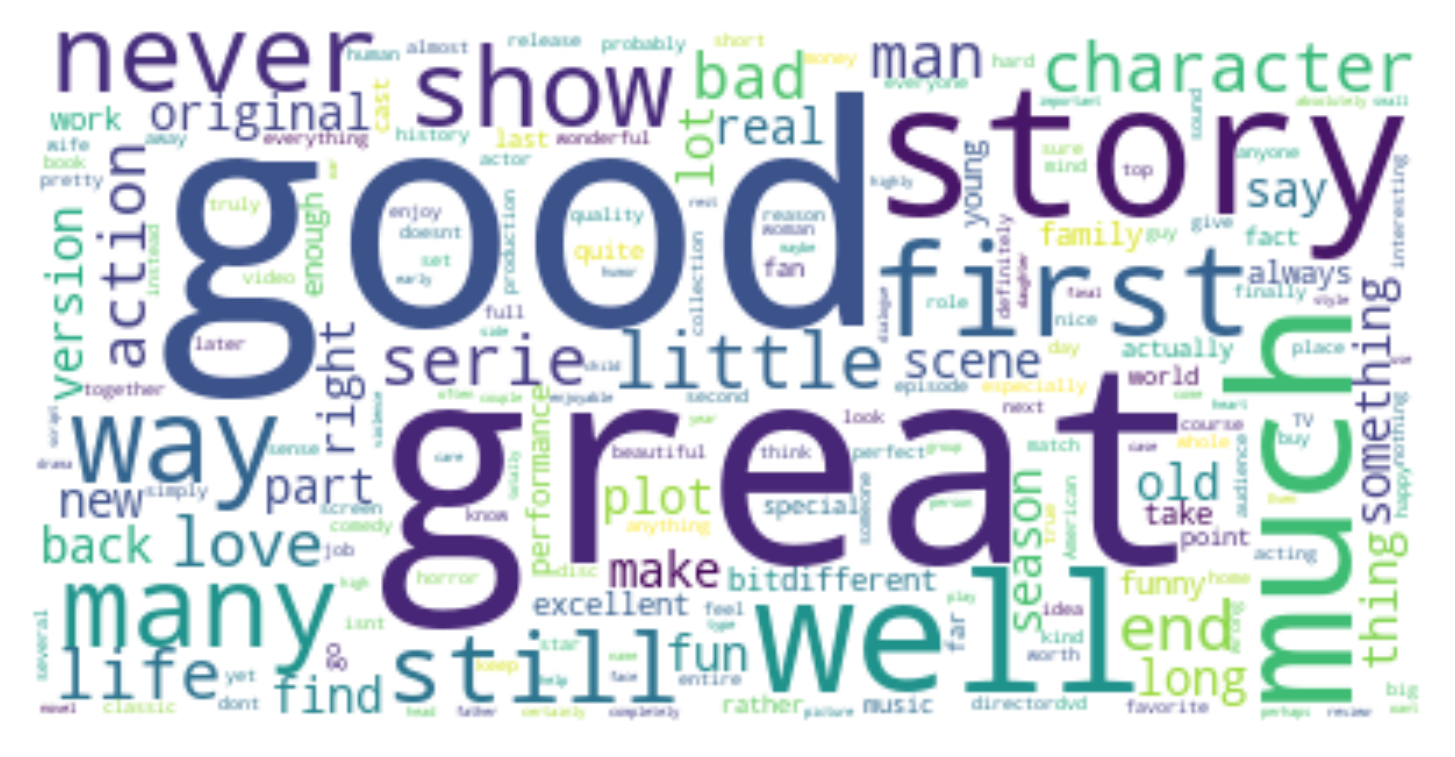

#### NMF Topic Modeling
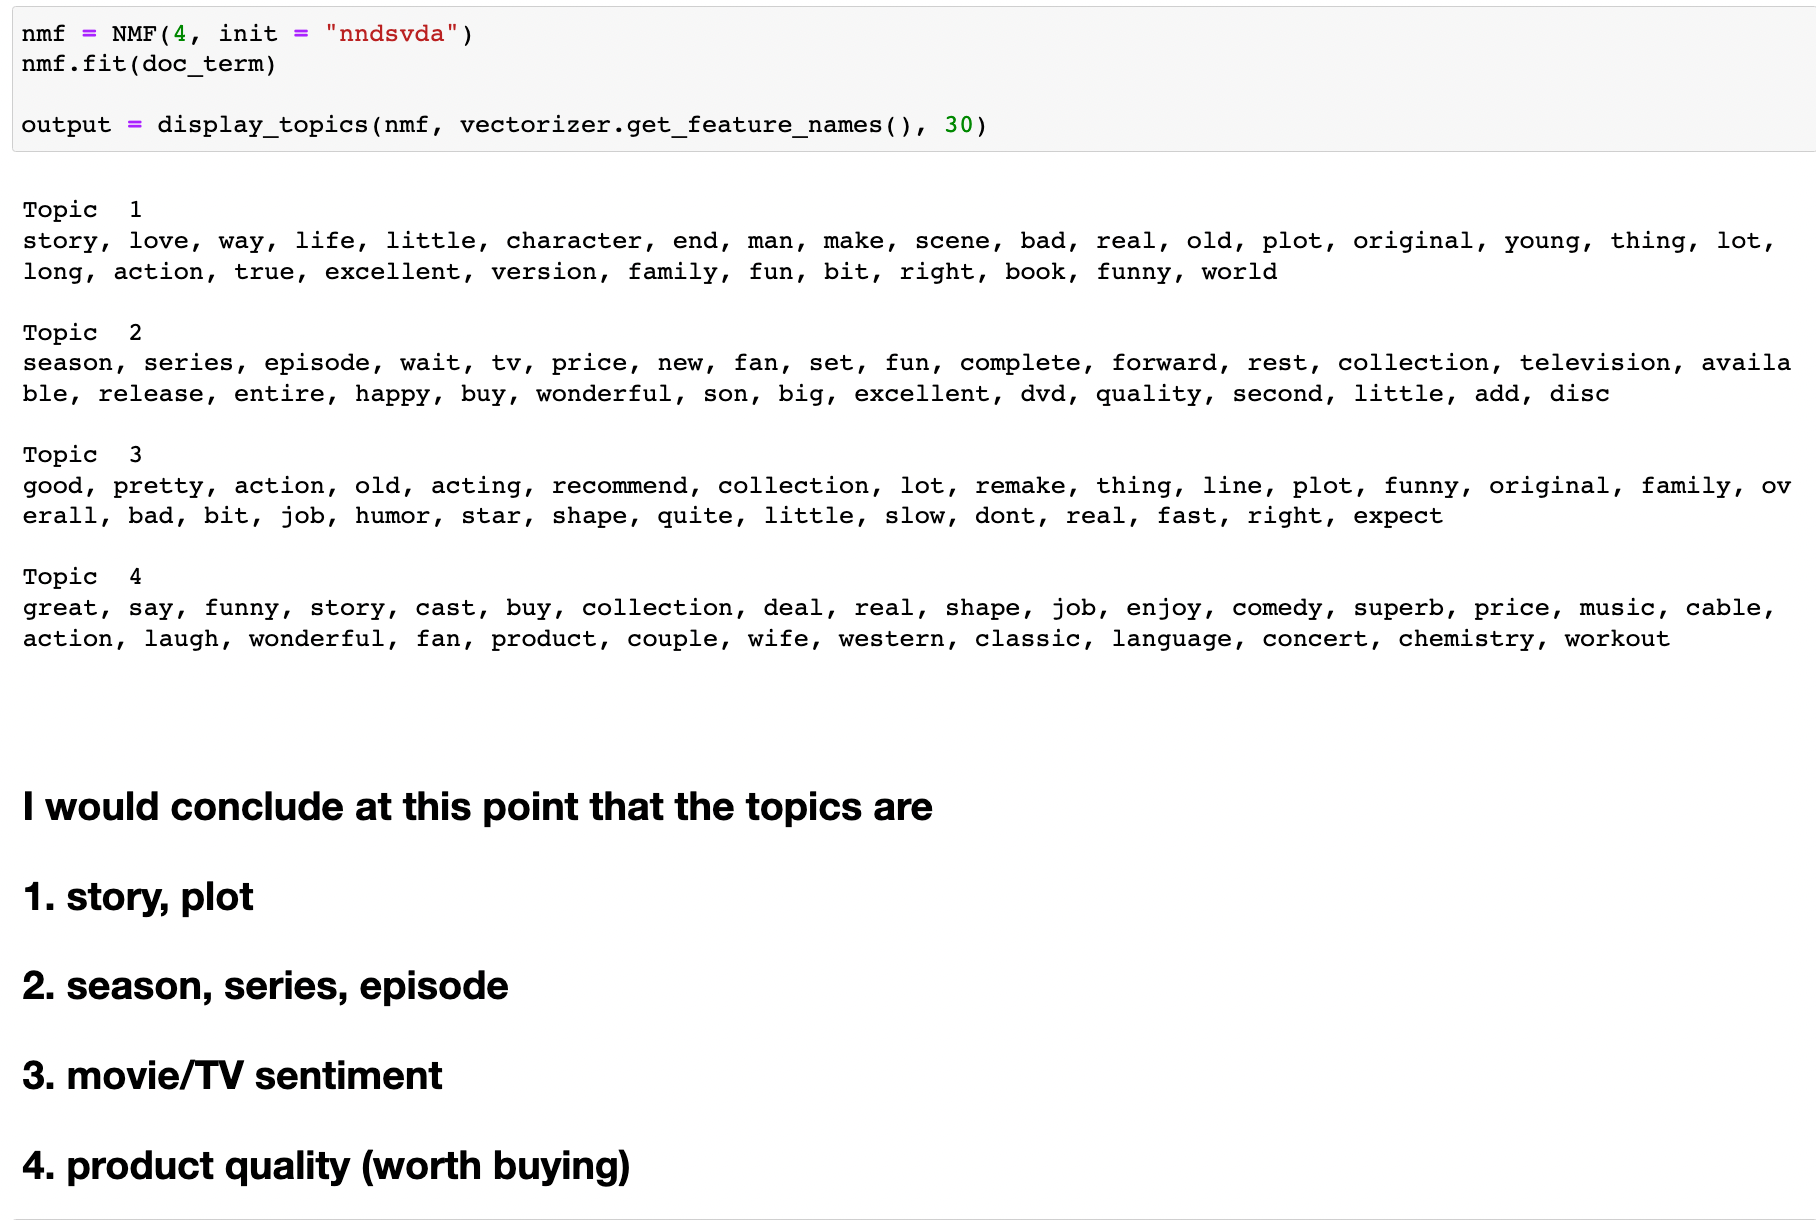

# Main Work below

In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
np.set_printoptions(suppress=True)

In [244]:
df=pd.read_csv('ReviewNoNull.csv')
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4,good version of a classic,1203984000,"02 26, 2008"
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3,Good but not as moving,1388361600,"12 30, 2013"
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"
3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008"
4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4,Best Scrooge yet,1387670400,"12 22, 2013"
...,...,...,...,...,...,...,...,...,...
1697466,AV657BUYHHXZ2,B00LT1JHLW,"Mike Rules ""Mike""","[1, 14]",wow $269.99 for the entire series on Blu Ray??...,1,Way to Expensive!! WB = GREED,1406073600,"07 23, 2014"
1697467,A17W587EH23J0Q,B00LT1JHLW,"Ron2900 ""Ron""","[32, 48]","Finally, the holy grail of tv-on-dvd boxsets i...",5,"HOLY BAT-BOXSET, BATMAN... I never thought thi...",1405641600,"07 18, 2014"
1697468,A3DE438TF1A958,B00LT1JHLW,thomas henry,"[3, 10]",Could this be a true or I'm i dreaming batman ...,5,prayers have been answered because batman 60s ...,1405728000,"07 19, 2014"
1697469,A2RWCXDMANY0LW,B00LT1JHLW,wheev,"[0, 4]",I've been a fan of the series since I was a yo...,5,can't Wait!,1405987200,"07 22, 2014"


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697471 entries, 0 to 1697470
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   reviewerID      object
 1   asin            object
 2   reviewerName    object
 3   helpful         object
 4   reviewText      object
 5   overall         int64 
 6   summary         object
 7   unixReviewTime  int64 
 8   reviewTime      object
dtypes: int64(2), object(7)
memory usage: 116.6+ MB


# Text Processing

In [9]:
import re
import string

df['reviewText']= df['reviewText'].map(lambda x: re.sub('\d','', x))
df['reviewText']= df['reviewText'].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [10]:
df['reviewText']

0          This is a charming version of the classic Dick...
1          It was good but not as emotionally moving as t...
2          Dont get me wrong Winkler is a wonderful chara...
3          Henry Winkler is very good in this twist on th...
4          This is one of the best Scrooge movies out  He...
                                 ...                        
1697466    wow  for the entire series on Blu Ray Thats  p...
1697467    Finally the holy grail of tvondvd boxsets is c...
1697468    Could this be a true or Im i dreaming batman i...
1697469    Ive been a fan of the series since I was a you...
1697470    People seriously need to wake up and realize t...
Name: reviewText, Length: 1697471, dtype: object

In [11]:
from tqdm import tqdm
for i in tqdm (range (100), desc="Loading..."):
    df1=df.sample(frac=0.001,random_state = 2)

Loading...: 100%|█████████████████████████████| 100/100 [00:03<00:00, 28.52it/s]


In [12]:
df1

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
866740,A3STFVPM8NHJ7B,B0006GAI5U,A. Pierre,"[0, 0]",Bernie Mac plays Stan Ross a by the books no o...,3,Mac hits a single,1221091200,"09 11, 2008"
108034,ADJ7H7A440V1W,0790740680,claudia diorio,"[0, 2]",based on earlier reviews I watched the movie b...,2,so so,1358899200,"01 23, 2013"
366001,A27CFNHYZG6WS8,6303257348,darragh o'donoghue,"[120, 125]",To Yuma is a stark monochrome Western that ha...,4,From a time when men had to prove they were men.,1022025600,"05 22, 2002"
1288565,A2IIOKKY2VUX4B,B002TQKL16,annette evers,"[1, 1]",Becker a laugh out loud sitcom hes rude crud...,5,netever,1291852800,"12 9, 2010"
607916,A1T9YSDAYS097M,B00005JLX8,D. Bannister,"[0, 0]",The first feature from director Dylan Kidd is ...,4,Great movie,1048550400,"03 25, 2003"
...,...,...,...,...,...,...,...,...,...
1103112,A1R38TTQCH98NJ,B000VNMMQ6,"Christspassion ""Karen""","[1, 3]",This was the best Die Hard out of the of them...,5,The best Die Hard,1199232000,"01 2, 2008"
13923,AIGNHBYSQ6YGI,0767817729,Murieta Forum,"[4, 8]",This is by far the worst Tony Scott film ever ...,3,The Worst Tony Scott film ever made,991785600,"06 6, 2001"
1342295,A2MCV7OC7ROBRS,B003EYVXXC,"Pearl Girl ""pearlegirl23""","[0, 0]",This movie has no theme completely vain and se...,1,Vain and pointless,1393113600,"02 23, 2014"
594008,A2R1HAXRNU0QX7,B00005JL29,RMurray847,"[0, 0]",The best reason to see this movie now several ...,3,Great early Gosling...but Bullock fails to con...,1190678400,"09 25, 2007"


In [23]:
from tqdm import tqdm
  
for i in tqdm (range (100), desc="Loading..."):
    
    from nltk.tag import pos_tag
    from nltk.tokenize import word_tokenize

    def parts_of_speech(text):
        pos_list = pos_tag(word_tokenize(text))
        pos = ''
        for item in pos_list:
            if item[1] == 'JJ' or item[1] == 'VB' or item[1] == 'NN' or item[1] =='RB':
                pos = pos + item[0] + ' '
        return pos 

    pos = df1['reviewText'].map(parts_of_speech)


Loading...: 100%|█████████████████████████████| 100/100 [12:58<00:00,  7.78s/it]


In [24]:
print(pos)

866740     one then player beginning film middle boring c...
108034              reviews movie reason kind film audience 
366001     stark monochrome suspense high moral tone dark...
1288565    laugh loud sitcom crude yet big heart cast fun...
607916     first feature director knockout brilliant stro...
                                 ...                        
1103112    plot plot john fight computer action listen ne...
13923      far film ever rest offense really see not succ...
1342295    movie theme completely vain Totally shallow ho...
594008     reason see movie now several enjoy early role ...
1535990    Yea i even say mush show orignal creative anam...
Name: reviewText, Length: 1697, dtype: object


In [25]:
df1['pos_review']=pos

In [48]:
df1

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,pos_review
866740,A3STFVPM8NHJ7B,B0006GAI5U,A. Pierre,"[0, 0]",Bernie Mac plays Stan Ross a by the books no o...,3,Mac hits a single,1221091200,"09 11, 2008",one then player beginning film middle boring c...
108034,ADJ7H7A440V1W,0790740680,claudia diorio,"[0, 2]",based on earlier reviews I watched the movie b...,2,so so,1358899200,"01 23, 2013",reviews movie reason kind film audience
366001,A27CFNHYZG6WS8,6303257348,darragh o'donoghue,"[120, 125]",To Yuma is a stark monochrome Western that ha...,4,From a time when men had to prove they were men.,1022025600,"05 22, 2002",stark monochrome suspense high moral tone dark...
1288565,A2IIOKKY2VUX4B,B002TQKL16,annette evers,"[1, 1]",Becker a laugh out loud sitcom hes rude crud...,5,netever,1291852800,"12 9, 2010",laugh loud sitcom crude yet big heart cast fun...
607916,A1T9YSDAYS097M,B00005JLX8,D. Bannister,"[0, 0]",The first feature from director Dylan Kidd is ...,4,Great movie,1048550400,"03 25, 2003",first feature director knockout brilliant stro...
...,...,...,...,...,...,...,...,...,...,...
1103112,A1R38TTQCH98NJ,B000VNMMQ6,"Christspassion ""Karen""","[1, 3]",This was the best Die Hard out of the of them...,5,The best Die Hard,1199232000,"01 2, 2008",plot plot john fight computer action listen ne...
13923,AIGNHBYSQ6YGI,0767817729,Murieta Forum,"[4, 8]",This is by far the worst Tony Scott film ever ...,3,The Worst Tony Scott film ever made,991785600,"06 6, 2001",far film ever rest offense really see not succ...
1342295,A2MCV7OC7ROBRS,B003EYVXXC,"Pearl Girl ""pearlegirl23""","[0, 0]",This movie has no theme completely vain and se...,1,Vain and pointless,1393113600,"02 23, 2014",movie theme completely vain Totally shallow ho...
594008,A2R1HAXRNU0QX7,B00005JL29,RMurray847,"[0, 0]",The best reason to see this movie now several ...,3,Great early Gosling...but Bullock fails to con...,1190678400,"09 25, 2007",reason see movie now several enjoy early role ...


In [43]:
df1.to_csv('pos_review1697.csv',index=False)

In [247]:
df=pd.read_csv('pos_review1697.csv')
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,pos_review
0,A3STFVPM8NHJ7B,B0006GAI5U,A. Pierre,"[0, 0]",Bernie Mac plays Stan Ross a by the books no o...,3,Mac hits a single,1221091200,"09 11, 2008",one then player beginning film middle boring c...
1,ADJ7H7A440V1W,0790740680,claudia diorio,"[0, 2]",based on earlier reviews I watched the movie b...,2,so so,1358899200,"01 23, 2013",reviews movie reason kind film audience
2,A27CFNHYZG6WS8,6303257348,darragh o'donoghue,"[120, 125]",To Yuma is a stark monochrome Western that ha...,4,From a time when men had to prove they were men.,1022025600,"05 22, 2002",stark monochrome suspense high moral tone dark...
3,A2IIOKKY2VUX4B,B002TQKL16,annette evers,"[1, 1]",Becker a laugh out loud sitcom hes rude crud...,5,netever,1291852800,"12 9, 2010",laugh loud sitcom crude yet big heart cast fun...
4,A1T9YSDAYS097M,B00005JLX8,D. Bannister,"[0, 0]",The first feature from director Dylan Kidd is ...,4,Great movie,1048550400,"03 25, 2003",first feature director knockout brilliant stro...
...,...,...,...,...,...,...,...,...,...,...
1692,A1R38TTQCH98NJ,B000VNMMQ6,"Christspassion ""Karen""","[1, 3]",This was the best Die Hard out of the of them...,5,The best Die Hard,1199232000,"01 2, 2008",plot plot john fight computer action listen ne...
1693,AIGNHBYSQ6YGI,0767817729,Murieta Forum,"[4, 8]",This is by far the worst Tony Scott film ever ...,3,The Worst Tony Scott film ever made,991785600,"06 6, 2001",far film ever rest offense really see not succ...
1694,A2MCV7OC7ROBRS,B003EYVXXC,"Pearl Girl ""pearlegirl23""","[0, 0]",This movie has no theme completely vain and se...,1,Vain and pointless,1393113600,"02 23, 2014",movie theme completely vain Totally shallow ho...
1695,A2R1HAXRNU0QX7,B00005JL29,RMurray847,"[0, 0]",The best reason to see this movie now several ...,3,Great early Gosling...but Bullock fails to con...,1190678400,"09 25, 2007",reason see movie now several enjoy early role ...


In [248]:
df.pos_review.isnull().value_counts()

False    1693
True        4
Name: pos_review, dtype: int64

In [249]:
df=df[~df.pos_review.isna()]
df.to_csv('pos_review1693.csv',index=False)

# The Corpus

In [ ]:
df=pd.read_csv('pos_review1693.csv')

In [250]:
corpus = list(df['pos_review'])

In [9]:
len(corpus)

1693

# WordCloud visualizing common words

In [51]:
# !pip install wordcloud

In [251]:
text=' '.join(corpus)
# text

(-0.5, 399.5, 199.5, -0.5)

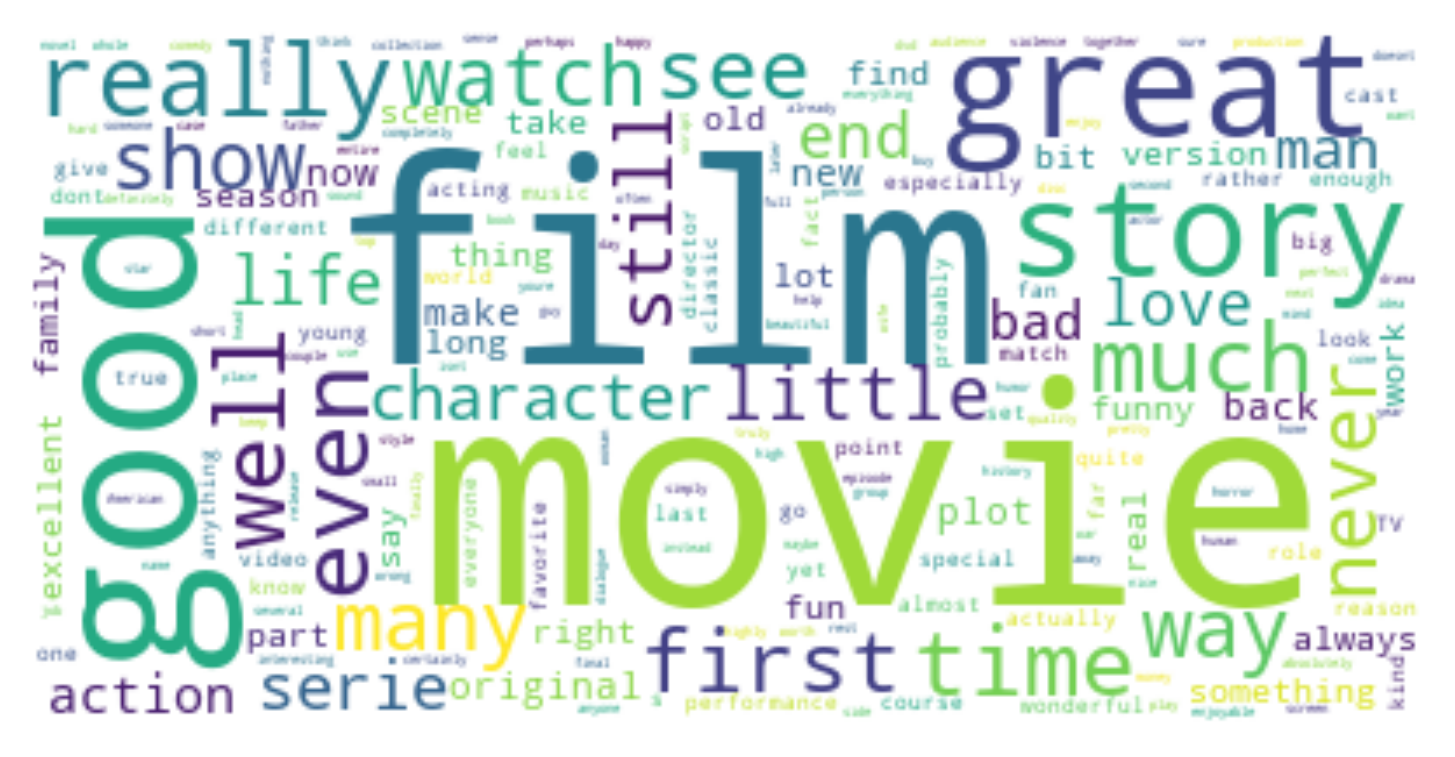

In [50]:
from wordcloud import WordCloud, STOPWORDS

# Generate a word cloud image
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(dpi=300)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# CountVectorizer

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer(stop_words = 'english',max_df=0.85, min_df=4)
X1 = cv1.fit_transform(corpus)
dtm1 = pd.DataFrame(X1.toarray(), columns=cv1.get_feature_names())

dtm1

,ability,able,abortion,absence,absent,absolute,absolutely,absurd,absurdity,abuse,...,youd,youll,young,youre,youth,youthful,youve,yrs,zombie,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [252]:
# print(dtm1.columns.to_list())

# TfidfVectorizer

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_df=0.85, min_df=4)
doc_term = vectorizer.fit_transform(corpus).toarray()
doc_term_df = pd.DataFrame(doc_term,columns=vectorizer.get_feature_names())
doc_term_df

,ability,able,abortion,absence,absent,absolute,absolutely,absurd,absurdity,abuse,...,youd,youll,young,youre,youth,youthful,youve,yrs,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.085216,0.0,0.0,0.0,0.0,0.0,0.0


# LSA Topic Modeling

In [82]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(5)
lsa.fit(doc_term)

TruncatedSVD(n_components=5)

In [91]:
topic_term = lsa.components_.round(4)

topic_term_df = pd.DataFrame(topic_term,
                index = ['compenent1','2','3','4','5'],
                columns = vectorizer.get_feature_names())
topic_term_df

,ability,able,abortion,absence,absent,absolute,absolutely,absurd,absurdity,abuse,...,youd,youll,young,youre,youth,youthful,youve,yrs,zombie,zone
topic1,0.0103,0.0145,0.0014,0.0024,0.0016,0.0075,0.0244,0.0027,0.0022,0.0045,...,0.0052,0.0197,0.0497,0.0333,0.0034,0.0022,0.0066,0.0032,0.0095,0.0030
2,-0.0080,-0.0096,-0.0012,-0.0052,-0.0028,-0.0051,-0.0160,-0.0005,-0.0019,-0.0061,...,0.0005,0.0036,-0.0533,-0.0175,-0.0024,-0.0014,-0.0030,0.0004,0.0021,-0.0001
3,-0.0094,0.0134,0.0003,0.0072,0.0040,-0.0057,0.0044,0.0093,0.0001,-0.0059,...,-0.0051,0.0073,0.0046,-0.0085,-0.0026,-0.0015,-0.0017,0.0077,-0.0067,-0.0012
4,-0.0044,-0.0097,0.0021,-0.0037,-0.0009,-0.0001,-0.0070,-0.0048,0.0001,0.0007,...,-0.0022,0.0102,0.0058,0.0002,-0.0044,0.0022,0.0065,0.0067,0.0056,0.0013
5,-0.0089,-0.0097,-0.0007,-0.0028,-0.0015,-0.0006,-0.0175,-0.0092,-0.0004,-0.0021,...,-0.0040,-0.0082,-0.0118,-0.0134,0.0008,-0.0016,-0.0029,0.0039,-0.0083,-0.0022


In [92]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

In [99]:
output = display_topics(lsa, vectorizer.get_feature_names(), 20)
output;


Topic  1
movie, film, good, great, just, really, story, time, watch, way, little, love, series, character, action, life, old, funny, end, real

Topic  2
movie, good, watch, recommend, funny, entertaining, theater, cable, predictable, cute, shape, rainy, really, adorable, suggest, great, awesome, moviei, sweet, holiday

Topic  3
season, series, good, great, episode, watch, tv, collection, wait, time, set, buy, just, price, fan, old, new, really, fun, forward

Topic  4
good, really, pretty, action, acting, remake, thing, lot, bad, didnt, bit, plot, original, old, line, overall, slow, humor, right, iti

Topic  5
great, good, watch, story, say, collection, shape, funny, laugh, deal, superb, comedy, buy, workout, pretty, cast, cable, loud, concert, job




# NMF Topic Modeling

In [96]:
from sklearn.decomposition import NMF
nmf = NMF(2, init = "nndsvda")
nmf.fit(doc_term)
nmf

NMF(init='nndsvda', n_components=2)

In [97]:
topic_term = nmf.components_.round(3)
topic_term

array([[0.009, 0.012, 0.001, ..., 0.007, 0.024, 0.006],
       [0.029, 0.04 , 0.004, ..., 0.005, 0.012, 0.005]])

In [98]:
topic_term_df = pd.DataFrame(topic_term.round(3),
                index = ["component_1", "component_2"],
                columns = vectorizer.get_feature_names())
topic_term_df

,ability,able,abortion,absence,absent,absolute,absolutely,absurd,absurdity,abuse,...,youd,youll,young,youre,youth,youthful,youve,yrs,zombie,zone
component_1,0.009,0.012,0.001,0.000,0.000,0.008,0.024,0.005,0.001,0.001,...,0.012,0.046,0.014,0.040,0.004,0.002,0.008,0.007,0.024,0.006
component_2,0.029,0.040,0.004,0.011,0.007,0.020,0.066,0.005,0.007,0.016,...,0.008,0.028,0.165,0.082,0.009,0.006,0.016,0.005,0.012,0.005


In [100]:
output = display_topics(nmf, vectorizer.get_feature_names(), 20)


Topic  1
movie, good, great, watch, really, just, story, time, funny, action, way, old, say, recommend, family, love, bad, fan, reason, true

Topic  2
film, just, story, great, series, good, time, really, character, season, little, life, love, way, original, man, young, watch, make, new




In [102]:
nmf = NMF(3, init = "nndsvda")
nmf.fit(doc_term)

output = display_topics(nmf, vectorizer.get_feature_names(), 20)


Topic  1
movie, good, great, really, watch, just, story, time, funny, action, way, old, love, say, recommend, bad, family, true, end, reason

Topic  2
film, just, story, character, time, life, little, love, really, way, scene, make, man, original, great, young, real, end, bit, plot

Topic  3
season, series, great, good, episode, watch, tv, just, time, collection, wait, really, fan, new, set, fun, buy, price, old, little




In [103]:
nmf = NMF(4, init = "nndsvda")
nmf.fit(doc_term)

output = display_topics(nmf, vectorizer.get_feature_names(), 20)


Topic  1
movie, great, watch, really, just, time, story, funny, way, action, love, say, true, reason, enjoy, fan, family, end, recommend, old

Topic  2
film, just, story, character, time, life, love, little, way, scene, really, make, man, great, young, original, end, real, role, director

Topic  3
season, series, great, episode, watch, tv, time, just, wait, new, fan, set, collection, fun, price, buy, wonderful, say, really, little

Topic  4
good, really, pretty, just, old, action, lot, thing, acting, collection, line, original, story, remake, bad, little, plot, didnt, bit, job




In [104]:
nmf = NMF(5, init = "nndsvda")
nmf.fit(doc_term)

output = display_topics(nmf, vectorizer.get_feature_names(), 20)


Topic  1
movie, really, time, just, story, way, action, watch, funny, reason, true, end, fan, love, recommend, bad, happy, enjoy, man, favorite

Topic  2
film, just, story, character, life, time, little, way, love, really, scene, make, man, original, young, end, quite, role, bit, director

Topic  3
season, series, episode, tv, wait, time, new, fan, really, fun, set, just, price, complete, little, rest, excellent, happy, forward, collection

Topic  4
good, really, pretty, just, old, action, lot, thing, acting, collection, line, original, story, remake, didnt, bad, little, plot, bit, job

Topic  5
great, watch, story, just, say, funny, time, buy, love, collection, comedy, old, laugh, wonderful, cast, enjoy, real, family, wife, classic




# Refining the corpus 
# And iterate the process

In [106]:
df.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,pos_review
0,A3STFVPM8NHJ7B,B0006GAI5U,A. Pierre,"[0, 0]",Bernie Mac plays Stan Ross a by the books no o...,3,Mac hits a single,1221091200,"09 11, 2008",one then player beginning film middle boring c...
1,ADJ7H7A440V1W,0790740680,claudia diorio,"[0, 2]",based on earlier reviews I watched the movie b...,2,so so,1358899200,"01 23, 2013",reviews movie reason kind film audience
2,A27CFNHYZG6WS8,6303257348,darragh o'donoghue,"[120, 125]",To Yuma is a stark monochrome Western that ha...,4,From a time when men had to prove they were men.,1022025600,"05 22, 2002",stark monochrome suspense high moral tone dark...


In [108]:
df.overall.value_counts()/len(df)

5    0.558771
4    0.212640
3    0.112227
2    0.062020
1    0.054341
Name: overall, dtype: float64

In [253]:
# text

In [254]:
from collections import Counter
total_words=text.split()
word_counts = Counter(total_words)
print(len(text.split()))
# print(word_counts)

84047


In [128]:
count=0
for i in range(len(corpus)):
    if 'movie' in corpus[i]:
        count+=1
    if 'movie' not in corpus[i]:
        pass

count/len(corpus)

0.4630832841110455

In [133]:
def count_word_frequency(word):
    count=0
    for i in range(len(corpus)):
        if word in corpus[i]:
            count+=1
        if word not in corpus[i]:
            pass

    return count/len(corpus)

In [148]:
print(count_word_frequency('movie'))
print(count_word_frequency('film'))
print(count_word_frequency('not'))
print(count_word_frequency('be'))
print(count_word_frequency('good'))
print(count_word_frequency('just'))
print(count_word_frequency('so'))
print(count_word_frequency('very'))

0.4630832841110455
0.3095097460129947
0.45304193738924986
0.5026580035440047
0.2976963969285292
0.27643236857649145
0.5800354400472534
0.32959243945658595


In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_df=0.4, min_df=4)
doc_term = vectorizer.fit_transform(corpus).toarray()
doc_term_df = pd.DataFrame(doc_term,columns=vectorizer.get_feature_names())
doc_term_df

,ability,able,abortion,absence,absent,absolute,absolutely,absurd,absurdity,abuse,...,youd,youll,young,youre,youth,youthful,youve,yrs,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.086702,0.0,0.0,0.0,0.0,0.0,0.0


In [255]:
# text

In [229]:
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords = ['movie','film','youd','youll','youve', 'youre','th', 'once','aint','already','else','havent','one','see','watch',
                 'even','really','time','didnt'
                ]

stopwords.extend(new_stopwords)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [230]:
df['pos_review'] = df['pos_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df['pos_review']

0       player beginning middle boring cliched surpris...
1                            reviews reason kind audience
2       stark monochrome suspense high moral tone dark...
3       laugh loud sitcom crude yet big heart cast fun...
4       first feature director knockout brilliant stro...
                              ...                        
1685    plot plot john fight computer action listen ne...
1686          far ever rest offense successful Low budget
1687    theme completely vain Totally shallow horrible...
1688    reason several enjoy early role many performan...
1689    Yea say mush show orignal creative anamation w...
Name: pos_review, Length: 1690, dtype: object

In [231]:
df['pos_review'].isnull().value_counts()

False    1690
Name: pos_review, dtype: int64

In [232]:
df=df[~df.pos_review.isna()]

In [233]:
df.to_csv('pos_review1693new.csv',index=False)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,pos_review
0,A3STFVPM8NHJ7B,B0006GAI5U,A. Pierre,"[0, 0]",Bernie Mac plays Stan Ross a by the books no o...,3,Mac hits a single,1221091200,"09 11, 2008",player beginning middle boring cliched surpris...
1,ADJ7H7A440V1W,0790740680,claudia diorio,"[0, 2]",based on earlier reviews I watched the movie b...,2,so so,1358899200,"01 23, 2013",reviews reason kind audience
2,A27CFNHYZG6WS8,6303257348,darragh o'donoghue,"[120, 125]",To Yuma is a stark monochrome Western that ha...,4,From a time when men had to prove they were men.,1022025600,"05 22, 2002",stark monochrome suspense high moral tone dark...
3,A2IIOKKY2VUX4B,B002TQKL16,annette evers,"[1, 1]",Becker a laugh out loud sitcom hes rude crud...,5,netever,1291852800,"12 9, 2010",laugh loud sitcom crude yet big heart cast fun...
4,A1T9YSDAYS097M,B00005JLX8,D. Bannister,"[0, 0]",The first feature from director Dylan Kidd is ...,4,Great movie,1048550400,"03 25, 2003",first feature director knockout brilliant stro...
...,...,...,...,...,...,...,...,...,...,...
1685,A1R38TTQCH98NJ,B000VNMMQ6,"Christspassion ""Karen""","[1, 3]",This was the best Die Hard out of the of them...,5,The best Die Hard,1199232000,"01 2, 2008",plot plot john fight computer action listen ne...
1686,AIGNHBYSQ6YGI,0767817729,Murieta Forum,"[4, 8]",This is by far the worst Tony Scott film ever ...,3,The Worst Tony Scott film ever made,991785600,"06 6, 2001",far ever rest offense successful Low budget
1687,A2MCV7OC7ROBRS,B003EYVXXC,"Pearl Girl ""pearlegirl23""","[0, 0]",This movie has no theme completely vain and se...,1,Vain and pointless,1393113600,"02 23, 2014",theme completely vain Totally shallow horrible...
1688,A2R1HAXRNU0QX7,B00005JL29,RMurray847,"[0, 0]",The best reason to see this movie now several ...,3,Great early Gosling...but Bullock fails to con...,1190678400,"09 25, 2007",reason several enjoy early role many performan...


In [257]:
df=pd.read_csv('pos_review1693new.csv')
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,pos_review
0,A3STFVPM8NHJ7B,B0006GAI5U,A. Pierre,"[0, 0]",Bernie Mac plays Stan Ross a by the books no o...,3,Mac hits a single,1221091200,"09 11, 2008",player beginning middle boring cliched surpris...
1,ADJ7H7A440V1W,0790740680,claudia diorio,"[0, 2]",based on earlier reviews I watched the movie b...,2,so so,1358899200,"01 23, 2013",reviews reason kind audience
2,A27CFNHYZG6WS8,6303257348,darragh o'donoghue,"[120, 125]",To Yuma is a stark monochrome Western that ha...,4,From a time when men had to prove they were men.,1022025600,"05 22, 2002",stark monochrome suspense high moral tone dark...
3,A2IIOKKY2VUX4B,B002TQKL16,annette evers,"[1, 1]",Becker a laugh out loud sitcom hes rude crud...,5,netever,1291852800,"12 9, 2010",laugh loud sitcom crude yet big heart cast fun...
4,A1T9YSDAYS097M,B00005JLX8,D. Bannister,"[0, 0]",The first feature from director Dylan Kidd is ...,4,Great movie,1048550400,"03 25, 2003",first feature director knockout brilliant stro...
...,...,...,...,...,...,...,...,...,...,...
1685,A1R38TTQCH98NJ,B000VNMMQ6,"Christspassion ""Karen""","[1, 3]",This was the best Die Hard out of the of them...,5,The best Die Hard,1199232000,"01 2, 2008",plot plot john fight computer action listen ne...
1686,AIGNHBYSQ6YGI,0767817729,Murieta Forum,"[4, 8]",This is by far the worst Tony Scott film ever ...,3,The Worst Tony Scott film ever made,991785600,"06 6, 2001",far ever rest offense successful Low budget
1687,A2MCV7OC7ROBRS,B003EYVXXC,"Pearl Girl ""pearlegirl23""","[0, 0]",This movie has no theme completely vain and se...,1,Vain and pointless,1393113600,"02 23, 2014",theme completely vain Totally shallow horrible...
1688,A2R1HAXRNU0QX7,B00005JL29,RMurray847,"[0, 0]",The best reason to see this movie now several ...,3,Great early Gosling...but Bullock fails to con...,1190678400,"09 25, 2007",reason several enjoy early role many performan...


In [256]:
# list(df.reviewText)

# WordCloud

In [258]:
corpus = list(df['pos_review'])
text=' '.join(corpus)

In [260]:
len(corpus)

1690

In [259]:
sum([len(d.split(' ')) for d in corpus])

69565

(-0.5, 399.5, 199.5, -0.5)

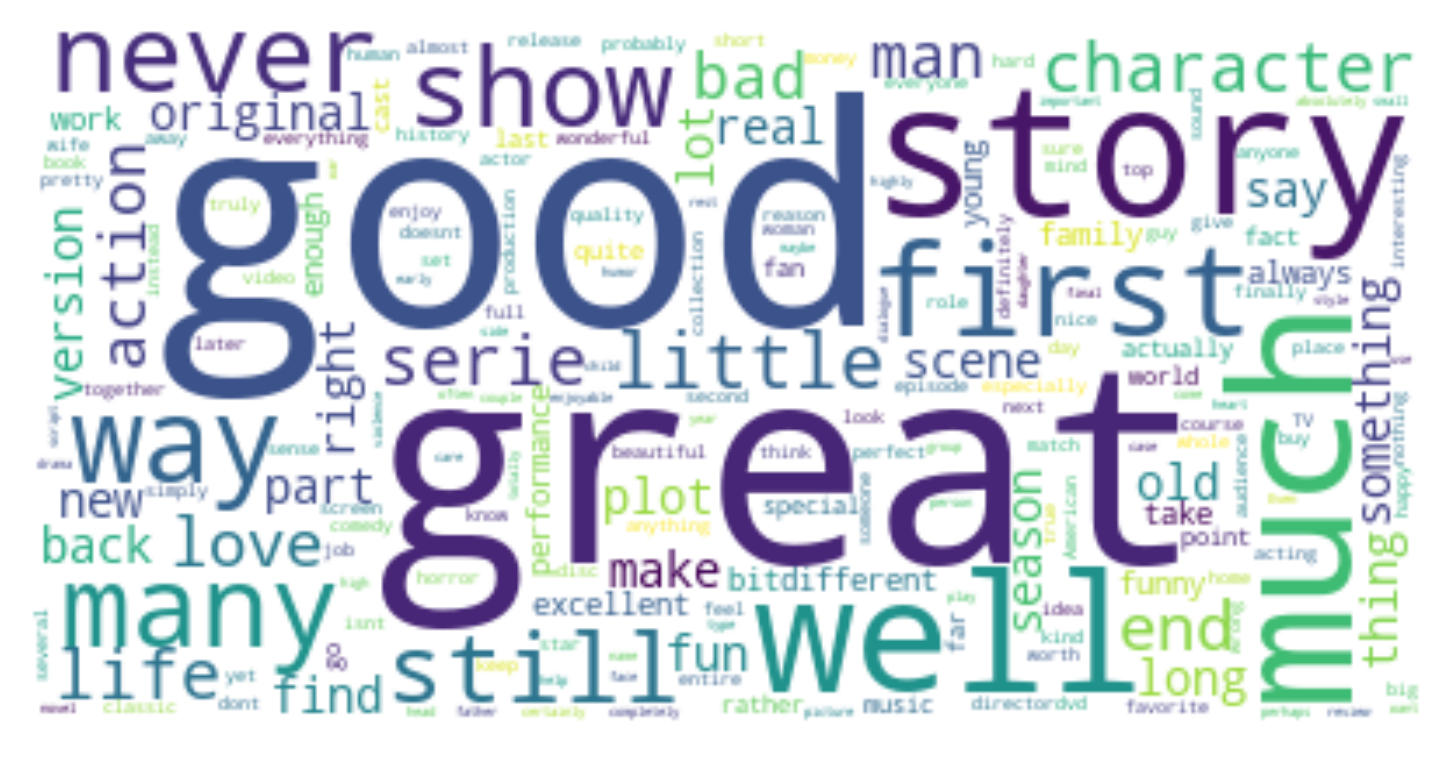

In [236]:
# Generate a word cloud image
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(dpi=300)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# TfidfVectorizer

In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_df=0.85, min_df=4)
doc_term = vectorizer.fit_transform(corpus).toarray()
doc_term_df = pd.DataFrame(doc_term,columns=vectorizer.get_feature_names())
doc_term_df

,ability,able,abortion,absence,absent,absolute,absolutely,absurd,absurdity,abuse,...,yell,yellow,yes,yoga,young,youth,youthful,yrs,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
nmf = NMF(4, init = "nndsvda")
nmf.fit(doc_term)

output = display_topics(nmf, vectorizer.get_feature_names(), 30)


Topic  1
story, love, way, life, little, character, end, man, make, scene, bad, real, old, plot, original, young, thing, lot, long, action, true, excellent, version, family, fun, bit, right, book, funny, world

Topic  2
season, series, episode, wait, tv, price, new, fan, set, fun, complete, forward, rest, collection, television, available, release, entire, happy, buy, wonderful, son, big, excellent, dvd, quality, second, little, add, disc

Topic  3
good, pretty, action, old, acting, recommend, collection, lot, remake, thing, line, plot, funny, original, family, overall, bad, bit, job, humor, star, shape, quite, little, slow, dont, real, fast, right, expect

Topic  4
great, say, funny, story, cast, buy, collection, deal, real, shape, job, enjoy, comedy, superb, price, music, cable, action, laugh, wonderful, fan, product, couple, wife, western, classic, language, concert, chemistry, workout




## I would conclude at this point that the topics are 
## 1. story, plot
## 2. season, series, episode
## 3. movie/TV sentiment 
## 4. product quality (worth buying)